In [200]:
# setup
from fastai.tabular import *

df = pd.read_csv('/notebooks/storage/brewing/acb.csv')
df.head()

,Beer,Brewery,Location,Table,Score,rAvg,Ratings,Bro Score,Style,ABV,URL
0,Abita Select Mayhawk,Abita Brewing Co.,"Abita Springs, LA",43.0,NaN,3.58,3,NaN,Belgian Pale Ale,6.50%,http://beeradvocate.com/beer/profile/3/93248
1,Amber,Abita Brewing Co.,"Abita Springs, LA",43.0,78.0,3.44,880,90.0,Vienna Lager,4.50%,http://beeradvocate.com/beer/profile/3/5
2,Lemon Wheat,Abita Brewing Co.,"Abita Springs, LA",43.0,76.0,3.15,18,NaN,American Pale Wheat Ale,?,http://beeradvocate.com/beer/profile/3/92293
3,Purple Haze,Abita Brewing Co.,"Abita Springs, LA",43.0,74.0,3.22,1585,88.0,Fruit / Vegetable Beer,4.20%,http://beeradvocate.com/beer/profile/3/7
4,Allagash Black - Bourbon Barrel Aged,Allagash Brewing Company,"Portland, ME",19.0,92.0,4.16,194,NaN,Belgian Strong Dark Ale,9.30%,http://beeradvocate.com/beer/profile/4/48279


In [201]:
#let's fix this data
df = df.drop(['Table', 'Score', 'Bro Score','URL'], axis=1)
df.head()

,Beer,Brewery,Location,rAvg,Ratings,Style,ABV
0,Abita Select Mayhawk,Abita Brewing Co.,"Abita Springs, LA",3.58,3,Belgian Pale Ale,6.50%
1,Amber,Abita Brewing Co.,"Abita Springs, LA",3.44,880,Vienna Lager,4.50%
2,Lemon Wheat,Abita Brewing Co.,"Abita Springs, LA",3.15,18,American Pale Wheat Ale,?
3,Purple Haze,Abita Brewing Co.,"Abita Springs, LA",3.22,1585,Fruit / Vegetable Beer,4.20%
4,Allagash Black - Bourbon Barrel Aged,Allagash Brewing Company,"Portland, ME",4.16,194,Belgian Strong Dark Ale,9.30%


In [202]:
#change ABV from string to float
df['ABV'] = df['ABV'].str.rstrip('%')
df.loc[df['ABV'] == '?', 'ABV'] = '5.00'
df['ABV'] = df['ABV'].astype(float)
df.head()

,Beer,Brewery,Location,rAvg,Ratings,Style,ABV
0,Abita Select Mayhawk,Abita Brewing Co.,"Abita Springs, LA",3.58,3,Belgian Pale Ale,6.5
1,Amber,Abita Brewing Co.,"Abita Springs, LA",3.44,880,Vienna Lager,4.5
2,Lemon Wheat,Abita Brewing Co.,"Abita Springs, LA",3.15,18,American Pale Wheat Ale,5.0
3,Purple Haze,Abita Brewing Co.,"Abita Springs, LA",3.22,1585,Fruit / Vegetable Beer,4.2
4,Allagash Black - Bourbon Barrel Aged,Allagash Brewing Company,"Portland, ME",4.16,194,Belgian Strong Dark Ale,9.3


In [203]:
df.count()

Beer        659
Brewery     659
Location    659
rAvg        659
Ratings     659
Style       659
ABV         659
dtype: int64

In [204]:
#more setup
dep_var = 'rAvg'
cat_names = ['Beer', 'Brewery', 'Location', 'Style']
cont_names = ['Ratings','ABV']

In [205]:
#setup databunch
procs = [FillMissing, Categorify, Normalize]
valid_idx = range(len(df)-200, len(df))

data = TabularDataBunch.from_df('/notebooks/storage/brewing/', df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names,cont_names=cont_names)
print(data.train_ds.cont_names)

['Ratings', 'ABV']


In [206]:
def accuracy_1(input:Tensor, targs:Tensor)->Rank0Tensor:
    targs = targs.view(-1).long()
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1)
    return (input==targs).float().mean()

In [221]:
#define the model
learn = tabular_learner(data, layers=[200,50], emb_szs={'Style': 10,
                                                         'Brewery': 5,
                                                         'Beer': 2}, metrics=mean_squared_error)
learn.lr_find(stop_div=False, num_it=200)
learn.fit_one_cycle(12, 2e-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,mean_squared_error
1,12.152596,11.789167,11.789167
2,11.640097,9.821027,9.821027
3,10.056464,3.442910,3.442910
4,7.435102,2.657854,2.657854
5,5.727341,1.482151,1.482151
6,4.489045,1.397920,1.397920
7,3.575449,1.399357,1.399357
8,2.895193,1.367216,1.367216
9,2.380683,1.364620,1.364620
10,1.981171,1.415814,1.415814


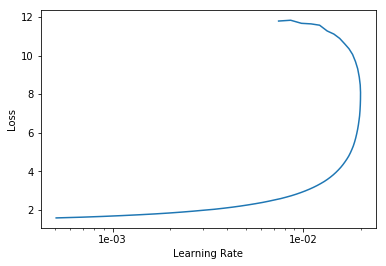

In [222]:
learn.recorder.plot()

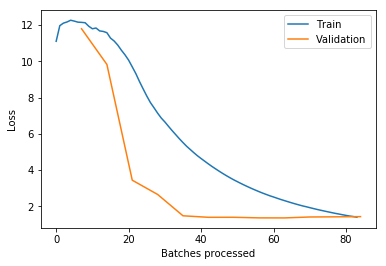

In [223]:
learn.recorder.plot_losses()

In [224]:
learn.save('acb-1')

In [225]:
learn.get_preds()

[tensor([[3.5572],
         [3.2805],
         [3.4989],
         [3.5273],
         [3.4171],
         [3.7490],
         [3.4912],
         [3.5741],
         [3.6203],
         [3.4739],
         [3.7938],
         [3.4092],
         [2.9050],
         [3.4636],
         [2.5448],
         [3.5101],
         [3.9894],
         [3.4945],
         [3.5864],
         [2.5341],
         [3.2657],
         [3.4978],
         [3.5354],
         [3.6645],
         [3.4684],
         [4.0732],
         [2.7235],
         [3.4544],
         [3.1389],
         [3.6089],
         [3.5114],
         [4.1400],
         [3.6281],
         [3.6130],
         [3.7523],
         [3.7356],
         [3.7060],
         [3.7957],
         [3.3507],
         [3.4386],
         [3.7494],
         [3.7546],
         [3.5590],
         [3.3719],
         [3.3742],
         [3.1719],
         [3.4663],
         [2.7590],
         [3.3934],
         [3.3204],
         [3.7830],
         [3.6828],
         [3.

In [234]:
df.iloc[500]

Beer        Smuttynose IPA "Finest Kind"
Brewery       Smuttynose Brewing Company
Location                  Portsmouth, NH
rAvg                                4.13
Ratings                             2734
Style                       American IPA
ABV                                  6.9
Name: 500, dtype: object

In [235]:
learn.predict(df.iloc[500])

(FloatItem [3.754566], tensor([3.7546]), tensor([3.7546]))

In [271]:
#define the model
learn2 = tabular_learner(data, layers=[500], emb_szs={'Style': 30,
                                                         'Brewery': 10,
                                                         'Beer': 3}, metrics=mean_squared_error)
learn2.lr_find(stop_div=False, num_it=200)
learn2.fit_one_cycle(18, 2.25e-3)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,mean_squared_error
1,13.253882,13.033635,13.033635
2,13.061928,12.732584,12.732584
3,12.826440,12.038849,12.038849
4,12.339852,10.498701,10.498701
5,11.488468,7.779749,7.779749
6,10.121755,4.090952,4.090952
7,8.407056,1.759897,1.759897
8,6.824443,1.392270,1.392270
9,5.602048,1.461479,1.461479
10,4.651642,1.414530,1.414530


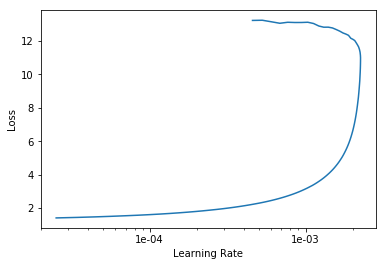

In [272]:
#plots
learn2.recorder.plot()

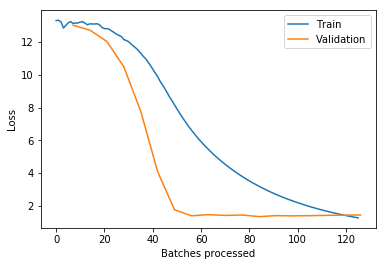

In [273]:
#plots
learn2.recorder.plot_losses()

In [274]:
df.iloc[500]

Beer        Smuttynose IPA "Finest Kind"
Brewery       Smuttynose Brewing Company
Location                  Portsmouth, NH
rAvg                                4.13
Ratings                             2734
Style                       American IPA
ABV                                  6.9
Name: 500, dtype: object

In [275]:
learn2.predict(df.iloc[500])

(FloatItem [3.851922], tensor([3.8519]), tensor([3.8519]))